**Image Classification with OpenCV and Deep Learning:**

OpenCV itself does not provide built-in models for image classification, but it can be used to preprocess images and load deep learning models like TensorFlow, Keras, or PyTorch models for classification.

**Steps for Image Classification Using OpenCV:**


*  Load Pre-trained Model (e.g., MobileNet, ResNet, or a custom CNN model)
*  Preprocess the Image (Resize, normalize, reshape)
*  Perform Inference (Prediction)
*  Display Results

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
config_file="/content/drive/MyDrive/Copy of ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="/content/drive/MyDrive/Copy of frozen_inference_graph.pb"

In [5]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
classLabels=[]
file_name="/content/drive/MyDrive/Copy of labels.txt"
with open(file_name,'rt') as fpt:
  classLabels = fpt.read().rstrip('\n').split('\n')

In [7]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7dcdf4322610>

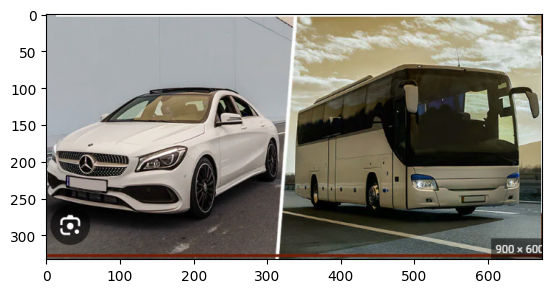

In [9]:
img=cv2.imread("/content/drive/MyDrive/Copy of cd.png")
plt.imshow(img)

In [10]:
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)

In [11]:
print(ClassIndex)

[6 3 1]


In [15]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
# Iterate over detected objects
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    x, y, w, h = boxes  # Unpack bounding box
    # Draw bounding box
    cv2.rectangle(img, (x, y), (x + w, y + h), (225, 0, 0), 2)
    # Draw label text
    cv2.putText(img, classLabels[ClassInd-1], (x + 10, y + 40), font, font_scale, (0, 255, 0), 3)

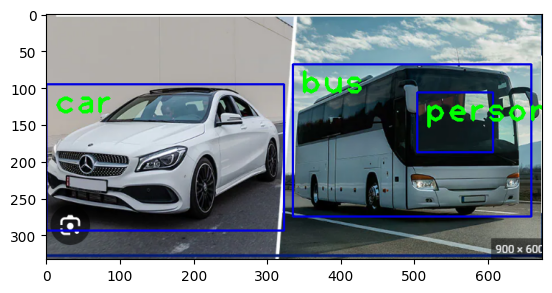

In [16]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))